In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch
from torch import nn # nn contains all of PyTorch's buildiing blocks for meural network



<Figure size 1152x504 with 0 Axes>

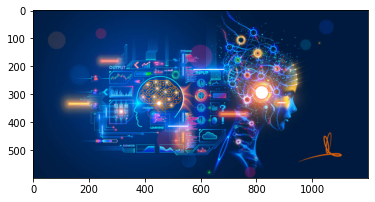

<Figure size 1152x504 with 0 Axes>

In [13]:
# Read Images
img = mpimg.imread('HN_machine_learning_ist.jpg') 
# Output Images
plt.imshow(img)
plt.figure(figsize=(16, 7))

# workflow in pytorch


In [6]:
# ==================================>    1. Data (preparing and loading) <=============================

In [101]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [102]:
# create test and training set
train_split = int(0.8 *  len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test =X[train_split:], y[train_split:]

len(X_train) ,len(y_train) ,len(X_test) ,len(y_test)

(80, 80, 20, 20)

In [103]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14}); 


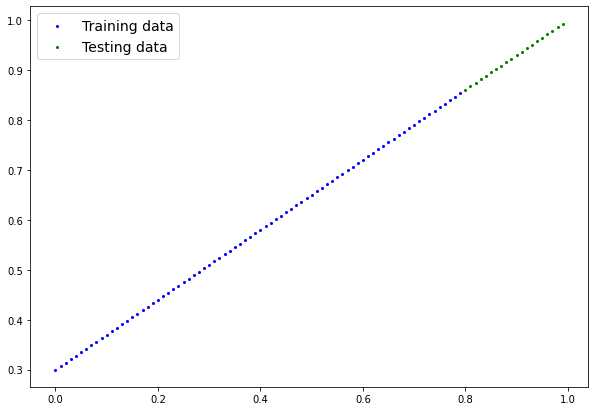

In [87]:
plot_predictions()

In [ ]:
# ========================================>  2. Building a model <================================

In [88]:
# build model using the yellow dots to predict the green dots
class LinearRergessionModel(nn.Module):       #=========> everything in pytorch is in nn.Module
    def __init__(self):
        super().__init__()
         # <== start with random weights and bias
         #  by default torch is float32
         # can  we update the weights with gradien descent
         #  ==================================================> y = weight * X + bias

        self.weights =nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True) 
        self.bias =nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)


        # forward defines the computation in the model
         # #  X is the input data (training and testing) data
         ## LINEAR REGRESSION FROMULA   y = weight * X + bias
        def forward(self,X:troch.Tensor) -> troch.Tensor:  
            return self.weights * X + self.bias  
           


In [104]:
# cheking the content of Pytorch Model
# set the manuel seed with random number
torch.manual_seed(42)

# create an instance of the model 
model_1 = LinearRegressionModel()

# check the nn.parameters
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [105]:
# list named parameters
model_1.state_dict()

# beacause we initialize the model we random values 
# we got the random tensors


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [91]:
# Making predicitions using the troch.infrencce_mode()
with torch.inference_mode():
    y_preds = model_1(X_test)

In [ ]:
#with torch.no_grad():
    #y1_preds = model_1(X_test)

In [106]:
# check predictions
print(f'Number of testing samples{len(X_test)}')
print(f'Number of predictions {len(y_preds)}')
print(f'predicted values:\n{y_preds}')

Number of testing samples20
Number of predictions 20
predicted values:
tensor([[0.8142],
        [0.8200],
        [0.8258],
        [0.8315],
        [0.8373],
        [0.8431],
        [0.8489],
        [0.8547],
        [0.8605],
        [0.8663],
        [0.8721],
        [0.8779],
        [0.8837],
        [0.8895],
        [0.8953],
        [0.9011],
        [0.9068],
        [0.9126],
        [0.9184],
        [0.9242]])


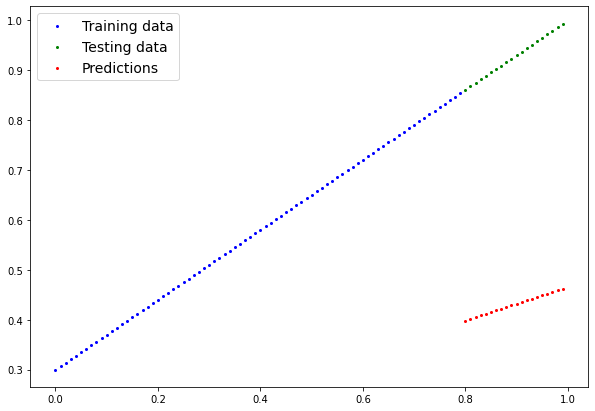

In [93]:

# now we scatter the predictions
#plot_predictions(predictions=y_preds)

plot_predictions(predictions=y_preds)

In [94]:
y_test - y_preds

tensor([[0.4618],
        [0.4655],
        [0.4691],
        [0.4727],
        [0.4764],
        [0.4800],
        [0.4836],
        [0.4873],
        [0.4909],
        [0.4945],
        [0.4982],
        [0.5018],
        [0.5054],
        [0.5091],
        [0.5127],
        [0.5163],
        [0.5200],
        [0.5236],
        [0.5272],
        [0.5309]])

In [ ]:
# ====================================>  3.Train model  <===============================


In [95]:
# create loss function
loss_func =nn.L1Loss()             # MAE 
# create optimizer
optimizer =torch.optim.SGD(params=model_1.parameters(), # parameters of target model to optimize
lr=0.01)

In [96]:
# PyTorch testing loop
torch.manual_seed(42)

# we set the number of epochs 
epochs = 100

# create empty list to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # training
    # put model in the training mode
    model_1.train()

    # 1 pass on train data using forward method inside
    y_preds = model_1(X_train)

    # 2 calculate the loss 
    loss=loss_func(y_preds,y_train)

    # 3  zero grade of optimzer
    optimizer.zero_grad()

    # 4 loss backword
    loss.backward()

    # 5 progress optimzer
    optimizer.step()

    # testing


    # put model in the testing mode

    model_1.eval()


    with torch.inference_mode():
        # forward pass on test data

        test_preds = model_1(X_test)

    # calculate the loss on test data
    test_loss = loss_func(test_preds,y_test.type(torch.float))

    #print out put
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy()) 
        test_loss_values.append(test_loss.detach().numpy()) 
        print(f"Epoch: {epoch} | MAE Mean Train loss: {loss}| MAE Mean Test loss: {test_loss}|")  

Epoch: 0 | MAE Mean Train loss: 0.31469792127609253| MAE Mean Test loss: 0.48281747102737427|
Epoch: 10 | MAE Mean Train loss: 0.19909533858299255| MAE Mean Test loss: 0.3474648892879486|
Epoch: 20 | MAE Mean Train loss: 0.08958515524864197| MAE Mean Test loss: 0.21752354502677917|
Epoch: 30 | MAE Mean Train loss: 0.05288771912455559| MAE Mean Test loss: 0.1439102590084076|
Epoch: 40 | MAE Mean Train loss: 0.045192889869213104| MAE Mean Test loss: 0.11271438747644424|
Epoch: 50 | MAE Mean Train loss: 0.04140976816415787| MAE Mean Test loss: 0.09821617603302002|
Epoch: 60 | MAE Mean Train loss: 0.03795855492353439| MAE Mean Test loss: 0.0888485461473465|
Epoch: 70 | MAE Mean Train loss: 0.034532517194747925| MAE Mean Test loss: 0.08085694909095764|
Epoch: 80 | MAE Mean Train loss: 0.03110707364976406| MAE Mean Test loss: 0.07252134382724762|
Epoch: 90 | MAE Mean Train loss: 0.027681414037942886| MAE Mean Test loss: 0.06452975422143936|


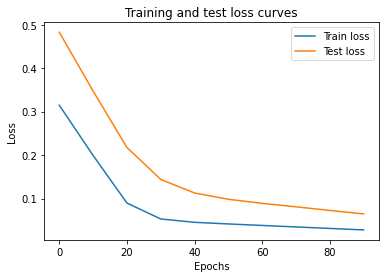

In [97]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned:")
print(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

: 

In [ ]:
#===================>4. Making predictions with a trained PyTorch model (inference)  <=====

In [99]:
 # Making predictions with a trained PyTorch model

 # 1. Set the model in evaluation mode
model_1.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_1(X_test)
y_preds

tensor([[0.8142],
        [0.8200],
        [0.8258],
        [0.8315],
        [0.8373],
        [0.8431],
        [0.8489],
        [0.8547],
        [0.8605],
        [0.8663],
        [0.8721],
        [0.8779],
        [0.8837],
        [0.8895],
        [0.8953],
        [0.9011],
        [0.9068],
        [0.9126],
        [0.9184],
        [0.9242]])

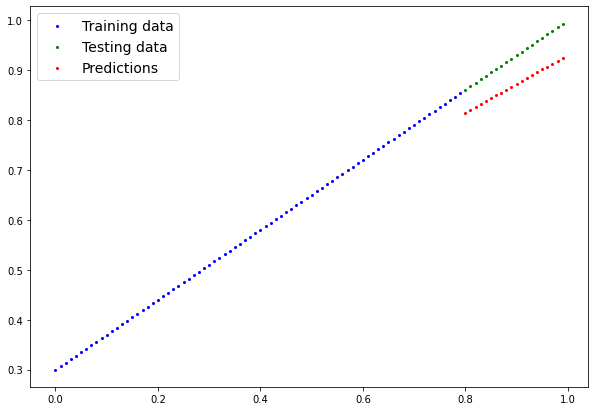

In [100]:
plot_predictions(predictions=y_preds)
